In [1]:
# Note, you'll need to install moviepy and natsort before running this code, if they aren't already installed.
# e.g., conda install moviepy -c conda-forge

import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage as ndi
import matplotlib.animation as animation
from moviepy import editor as mpy
import glob
import natsort

%matplotlib inline

### Random Walks

One of the simplest spatial simulations is the random walk.  Here, an agent starts at the origin, and then randomly moves in any direction.  This can be conceptualized by generating two random numbers between -.5 and .5 (or what have you) and then moving that far in the x and y direction.  The result is something like you see below.  Be sure to run this code a number of times to get a sense of the randomness.

Further Reading:<BR>
https://en.wikipedia.org/wiki/Random_walk

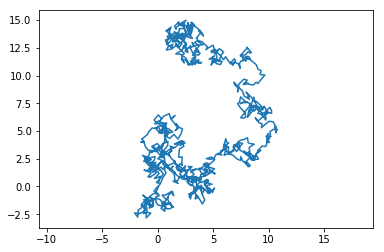

In [10]:
steps = 1000
X = np.zeros(steps)
Y = np.zeros(steps)
for i in range(1,steps):
    mx = np.random.rand() - .5
    my = np.random.rand() - .5
    X[i] = X[i-1] + mx
    Y[i] = Y[i-1] + my
plt.plot(X,Y)
plt.axes().set_aspect('equal', 'datalim')

The method above uses a loop, which, as we know, is somewhat inefficient.  A more convenient way is to model this by generating k random numbers (here again, beween -.5 and .5) and then taking their cumulative sum.  In this way, no looping needs to happen, and the resulting code is much more efficient with the same effect.

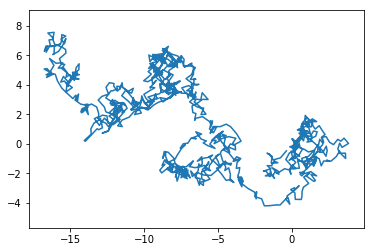

In [11]:
steps = 1000
x, y = np.random.rand(2,steps) - .5
x = np.cumsum(x)
y = np.cumsum(y)
plt.plot(x,y)
plt.axes().set_aspect('equal', 'datalim')


### Elementary Cellular Automata Models

Cellular Automata Models attempt to explicitly model space by virtue of an array of values.  Each cell in the array typically can only take on a discrete (yes, no, or other categorical) value.  A very simple cellular automata (CA) model (without any dynamism, yet) could be a 1 dimensional array of ones and zeroes.  

You should read more about elementary cellular automata before proceeding:<BR>
https://en.wikipedia.org/wiki/Elementary_cellular_automaton

[[0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0]]


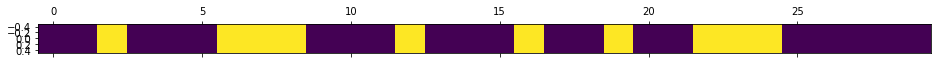

In [12]:
# Create a 1x30 binary (0,1) array and display using matshow
ca = np.random.randint(0,2,(1,30))
print(ca)
plt.matshow(ca)

To add dynamism, consider that a cell changes value based on itself, and what its neighbors are doing.  A cell "looks" left and right, and then decides whether to stay the same, or change.  There are 2^3 (8) possible states:

If:
111
110
101
100
011
010
001
000

If we know this, we can specify an eight digit (binary) stream that dictates what happens under those circumstances:
For example: 01101110, indicates 111 -> 0, 110 -> 1, 101 -> 1, etc.

Those 8 binary digital (or bits) form a byte, which can be interpreted as a number.

01101110 translates to 110 in decimal, for instance.

In [14]:
# Pixels change according to rules, based on their own value, and the value of their immediate neighbors
# The rule set is what can happen in all eight (2^3) of those cases, read as a binary string.
# In this case, 111 -> 0, 110 -> 1, 
# See https://en.wikipedia.org/wiki/Elementary_cellular_automaton for more information
int('01101110',base=2)

110

In [15]:
# The command "bin" will convert decimals to binaries (The "0b" at front indicates a binary string)
print(bin(110))

0b1101110


In [16]:
# You can also use string formatting to do the same thing.
'{0:08b}'.format(110)

'01101110'

So the simulation proceeds with the rules above applied to a one-dimensional array of ones and zeros.  Each line below represents the next step of the simulation, ultimately creating a 2D array, where the columns are space and the rows are time.  

In [17]:
# This is a handy implementation online.  You can replace the rules and string below.
# http://rosettacode.org/wiki/Elementary_cellular_automaton#Python
def eca(cells, rule):
    lencells = len(cells)
    c = "0" + cells + "0"    # Zero pad the ends
    rulebits = '{0:08b}'.format(rule)
    neighbours2next = {'{0:03b}'.format(n):rulebits[::-1][n] for n in range(8)}
    yield c[1:-1]
    while True:
        c = ''.join(['0',
                     ''.join(neighbours2next[c[i-1:i+2]]
                             for i in range(1,lencells+1)),
                     '0'])
        yield c[1:-1]
 
if __name__ == '__main__':
    lines, start, rules = 50, '0000000001000000000', (90, 30, 122)
    zipped = [range(lines)] + [eca(start, rule) for rule in rules]
    print('\n   Rules: %r' % (rules,))
    for data in zip(*zipped):
        i = data[0]
        cells = data[1:]
        print('%2i: %s' % (i, '    '.join(cells).replace('0', '.').replace('1', '#')))


   Rules: (90, 30, 122)
 0: .........#.........    .........#.........    .........#.........
 1: ........#.#........    ........###........    ........#.#........
 2: .......#...#.......    .......##..#.......    .......#.#.#.......
 3: ......#.#.#.#......    ......##.####......    ......#.#.#.#......
 4: .....#.......#.....    .....##..#...#.....    .....#.#.#.#.#.....
 5: ....#.#.....#.#....    ....##.####.###....    ....#.#.#.#.#.#....
 6: ...#...#...#...#...    ...##..#....#..#...    ...#.#.#.#.#.#.#...
 7: ..#.#.#.#.#.#.#.#..    ..##.####..######..    ..#.#.#.#.#.#.#.#..
 8: .#...............#.    .##..#...###.....#.    .#.#.#.#.#.#.#.#.#.
 9: #.#.............#.#    ##.####.##..#...###    #.#.#.#.#.#.#.#.#.#
10: ...#...........#...    #..#....#.####.##..    .#.#.#.#.#.#.#.#.#.
11: ..#.#.........#.#..    #####..##.#....#.#.    #.#.#.#.#.#.#.#.#.#
12: .#...#.......#...#.    #....###..##..##.##    .#.#.#.#.#.#.#.#.#.
13: #.#.#.#.....#.#.#.#    ##..##..###.###..#.    #.#.#.#.#.#.#.#

In [19]:
# This one assumes the cells wrap around the space (old Atari style)

def eca_wrap(cells, rule):
    lencells = len(cells)
    rulebits = '{0:08b}'.format(rule)
    neighbours2next = {tuple('{0:03b}'.format(n)):rulebits[::-1][n] for n in range(8)}
    c = cells
    while True:
        yield c
        c = ''.join(neighbours2next[(c[i-1], c[i], c[(i+1) % lencells])] for i in range(lencells))
 
if __name__ == '__main__':
    lines, start, rules = 50, '0000000001000000000', (90, 30, 122)
    zipped = [range(lines)] + [eca_wrap(start, rule) for rule in rules]
    print('\n   Rules: %r' % (rules,))
    for data in zip(*zipped):
        i = data[0]
        cells = data[1:]
        print('%2i: %s' % (i, '    '.join(cells).replace('0', '.').replace('1', '#')))


   Rules: (90, 30, 122)
 0: .........#.........    .........#.........    .........#.........
 1: ........#.#........    ........###........    ........#.#........
 2: .......#...#.......    .......##..#.......    .......#.#.#.......
 3: ......#.#.#.#......    ......##.####......    ......#.#.#.#......
 4: .....#.......#.....    .....##..#...#.....    .....#.#.#.#.#.....
 5: ....#.#.....#.#....    ....##.####.###....    ....#.#.#.#.#.#....
 6: ...#...#...#...#...    ...##..#....#..#...    ...#.#.#.#.#.#.#...
 7: ..#.#.#.#.#.#.#.#..    ..##.####..######..    ..#.#.#.#.#.#.#.#..
 8: .#...............#.    .##..#...###.....#.    .#.#.#.#.#.#.#.#.#.
 9: #.#.............#.#    ##.####.##..#...###    #.#.#.#.#.#.#.#.#.#
10: #..#...........#..#    ...#....#.####.##..    ##.#.#.#.#.#.#.#.##
11: ###.#.........#.###    ..###..##.#....#.#.    .##.#.#.#.#.#.#.##.
12: ..#..#.......#..#..    .##..###..##..##.##    ####.#.#.#.#.#.####
13: .#.##.#.....#.##.#.    .#.###..###.###..#.    ...##.#.#.#.#.#

In [20]:
# This one expands the space as it goes!
def _notcell(c):
    return '0' if c == '1' else '1'
 
def eca_infinite(cells, rule):
    lencells = len(cells)
    rulebits = '{0:08b}'.format(rule)
    neighbours2next = {'{0:03b}'.format(n):rulebits[::-1][n] for n in range(8)}
    c = cells
    while True:
        yield c
        c = _notcell(c[0])*2 + c + _notcell(c[-1])*2    # Extend and pad the ends
 
        c = ''.join(neighbours2next[c[i-1:i+2]] for i in range(1,len(c) - 1))
        #yield c[1:-1]
 
if __name__ == '__main__':
    lines, start, rules = 20, '1', (90, 30, 122)
    zipped = [range(lines)] + [eca_infinite(start, rule) for rule in rules]
    print('\n   Rules: %r' % (rules,))
    for data in zip(*zipped):
        i = data[0]
        cells = ['%s%s%s' % (' '*(lines - i), c, ' '*(lines - i)) for c in data[1:]]
        print('%2i: %s' % (i, '    '.join(cells).replace('0', '.').replace('1', '#')))


   Rules: (90, 30, 122)
 0:                     #                                            #                                            #                    
 1:                    #.#                                          ###                                          #.#                   
 2:                   #...#                                        ##..#                                        #.#.#                  
 3:                  #.#.#.#                                      ##.####                                      #.#.#.#                 
 4:                 #.......#                                    ##..#...#                                    #.#.#.#.#                
 5:                #.#.....#.#                                  ##.####.###                                  #.#.#.#.#.#               
 6:               #...#...#...#                                ##..#....#..#                                #.#.#.#.#.#.#              
 7:              #.#.#.

### Elementary Cellular Automata as Images

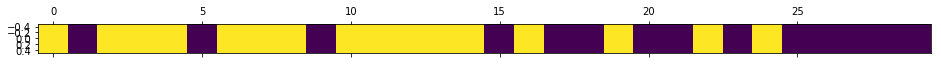

In [21]:
# The above examples work on strings, but we could generate numpy arrays of 0s and 1s as our basis:

row = np.random.randint(0,2,[1,30])
plt.matshow(row)

In [22]:
# This isn't very efficient code-wise, but it works.  Use it to help study the logic of the 1D Cellular Automata model

def calculate_change(three_cell,rule):
    # Change the decimal representation to binary
    rule_string = '{0:08b}'.format(rule)
    rule_array = np.fromstring(' '.join(rule_string),sep=' ',dtype=np.int)
    # And then return the appropriate change based on the three-item neighborhood
    if np.all(three_cell == np.array([1,1,1])):
        return rule_array[0]
    elif np.all(three_cell == np.array([1,1,0])):
        return rule_array[1]
    elif np.all(three_cell == np.array([1,0,1])):
        return rule_array[2]
    elif np.all(three_cell == np.array([1,0,0])):
        return rule_array[3]
    elif np.all(three_cell == np.array([0,1,1])):
        return rule_array[4]
    elif np.all(three_cell == np.array([0,1,0])):
        return rule_array[5]
    elif np.all(three_cell == np.array([0,0,1])):
        return rule_array[6]
    elif np.all(three_cell == np.array([0,0,0])):
        return rule_array[7]

In [23]:
calculate_change(np.array([1,1,1]),rule=110)

0

In [24]:
calculate_change(np.array([0,1,0]),rule=110)

1

In [25]:
calculate_change(np.array([0,0,0]),rule=110)

0

In [26]:
def mutate_row(row,rule,pad='zero'):
    row = row.ravel()
    if pad=='zero':
        row = np.hstack((0,row,0))
    elif pad=='reflect':
        row = np.hstack((row[0],row,row[-1]))
    elif pad=='wrap':
        row = np.hstack((row[-1],row,row[0]))
    new_row = np.zeros(np.shape(row),dtype=np.int)
    for i in range(1,len(row)-1):
        new_row[i] = calculate_change(row[i-1:i+2],rule)
    return new_row[1:-1]
    

In [37]:
row = np.random.randint(0,2,10)
print(row)

[0 1 1 1 0 1 1 0 0 1]


In [46]:
row = mutate_row(row,110,pad='zero')
print(row)

[1 1 1 0 1 1 1 0 0 1]


Run the simulation for an initial starting row.  Change the k,n, and rule values to play with the shape and output patterns for different rules.  Rules can be from 0 to 255.

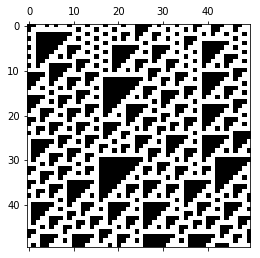

In [47]:
k = 50 # Number of iterations
n = 50 # Width of line
rule = 110
pad = 'wrap'

# Initializing a whole matrix of random integers; we'll only use the first row
# and over-write the rest and we move through the simulation.
sim = np.random.randint(0,2,(k,n))

# Starting with the second row (position 1), grab the previous row, mutate it
# and 
for i in range(1,k):
    last_row = sim[i-1,:]
    this_row = mutate_row(last_row,rule,pad)
    sim[i,:] = this_row

plt.matshow(sim,cmap='gray')

## The Game of Life

The Game of Life is a 2D Cellular Automata model, carefully construction to simulate a living environment.  Cells can be either alive or dead, but will change state on the next time series based on their value, and the value of their 8 neighbors.

It's not efficient to write our own if-else statements.  Instead, we can write a filter that will do this for us, without the need to code the loops.  It will also handle edge situations (wrapping, padding, etc.).

In [48]:
from scipy import ndimage as ndi

In [4]:
#1. Any live cell with fewer than two live neighbours dies, as if caused by under-population.
#2. Any live cell with two or three live neighbours lives on to the next generation.
#3. Any live cell with more than three live neighbours dies, as if by overcrowding.
#4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

def life_filter(neighborhood):
    neighborhood = neighborhood.reshape((3,3)) # Added to accommodate filter
    result = 0
    this_cell  = neighborhood[1,1]
    live_neighbors = np.sum(neighborhood) - this_cell
    if this_cell == 1:
        if live_neighbors==2 or live_neighbors==3:
            result = 1
    else:
        if live_neighbors==3:
            result=1
    return result

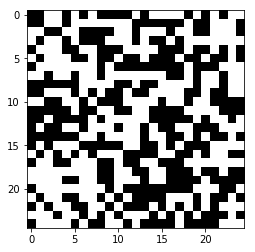

In [5]:
X = np.random.randint(0,2,(25,25))
plt.imshow(X,interpolation='none',cmap='gray')

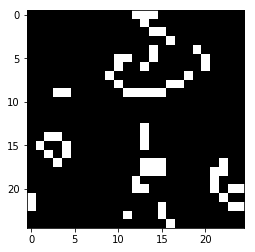

In [32]:
# Rerun this code block to sequentially modify the array

X = ndi.filters.generic_filter(X,life_filter,size=3,mode='wrap') 
plt.imshow(X,interpolation='none',cmap='gray')

# Animation

In [33]:
import matplotlib.animation as animation

In [34]:
%matplotlib qt

ImportError: cannot import name 'QtCore'

In [66]:
# Let's animate it!  This isn't really the right way to do it, so don't do too many frames.

%matplotlib qt
X = np.random.random_integers(0,1,(50,50))
for i in range(50):
    X = ndi.filters.generic_filter(X,life_filter,size=3,mode='wrap')
    plt.imshow(X,interpolation='none',cmap='gray')
    plt.pause(.1)

ImportError: cannot import name 'QtCore'

In [5]:
# This is one way to handle animation, using matplotlib.  (This isn't for the game of life.)
# At each time interval, updatefig is called, and a new image is calculated and im (the figure handle) is updated with
# a new array

%matplotlib qt

fig = plt.figure()

def f(x,y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0,2*np.pi,120)
y = np.linspace(0,2*np.pi,100).reshape(-1,1)

im = plt.imshow(f(x,y),cmap='jet')

def updatefig(*args):
    global x,y
    x += np.pi/15
    y += np.pi/20
    im.set_array(f(x,y))
    return im,

ani = animation.FuncAnimation(fig,updatefig,interval=50,blit=True)
plt.show()

In [6]:
# We'll use the same trick for the game of life.

%matplotlib qt

def life_filter(neighborhood):
    neighborhood = neighborhood.reshape((3,3)) # Added to accommodate filter
    result = 0
    this_cell  = neighborhood[1,1]
    live_neighbors = np.sum(neighborhood) - this_cell
    if this_cell == 1:
        if live_neighbors==2 or live_neighbors==3:
            result = 1
    else:
        if live_neighbors==3:
            result=1
    return result

def updatefig(*args):
    global X
    X = ndi.filters.generic_filter(X,life_filter,size=3,mode='wrap')
    im.set_array(X)
    return im,

X = np.random.randint(0,2,(50,50))
fig = plt.figure()
im = plt.imshow(X,interpolation='none',cmap='gray')
ani = animation.FuncAnimation(fig,updatefig,interval=50,blit=True)
plt.show()

To create a portable (avi,mp4, animated gif) animation, you write each frame to an output file, and then assemble those.

In [10]:
# Stage 1: Run the animation, and write each frame to an output directory as a PNG.

from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

outdir = 'out/animation/'
X = np.random.randint(0,2,(100,100))

def life_filter(neighborhood):
    neighborhood = neighborhood.reshape((3,3)) # Added to accommodate filter
    result = 0
    this_cell  = neighborhood[1,1]
    live_neighbors = np.sum(neighborhood) - this_cell
    if this_cell == 1:
        if live_neighbors==2 or live_neighbors==3:
            result = 1
    else:
        if live_neighbors==3:
            result=1
    return result

frames = 2000
for i in range(frames):
    X = ndi.filters.generic_filter(X,life_filter,size=3,mode='wrap')
    fn = outdir + "{:04d}".format(i) + '.png'
    plt.imsave(fn,X,cmap='gray')
    # Print output every 100th frame.
    if i%100==0:
        print(fn)

print('Done!')


out/animation/0000.png
out/animation/0100.png
out/animation/0200.png
out/animation/0300.png
out/animation/0400.png
out/animation/0500.png
out/animation/0600.png
out/animation/0700.png
out/animation/0800.png
out/animation/0900.png
out/animation/1000.png
out/animation/1100.png
out/animation/1200.png
out/animation/1300.png
out/animation/1400.png
out/animation/1500.png
out/animation/1600.png
out/animation/1700.png
out/animation/1800.png
out/animation/1900.png
Done!


In [11]:
# Stage 2: Assemble the PNGs using ffmpeg/moviepy 
# https://pypi.python.org/pypi/moviepy

# Given that the PNGs have already been created:
from moviepy import editor as mpy
import glob
import natsort

imageDirectory = "out/animation/*.png"

# Glob reads the directory into a list, natsort is a useful way to make sure files are
# sorted in order without requiring leading zeros.
# https://pypi.python.org/pypi/natsort
d = glob.glob(imageDirectory)
d = natsort.natsorted(d)

# Assemble the animation
clip = mpy.ImageSequenceClip(d, fps=10)

# Writing the video
clip.write_videofile("out/game_of_life.mp4",bitrate='20000k')

# Instead of writing a video, you can also export as animated GIFs, very handy for short animations
clip.write_gif("out/game_of_life.gif")


[MoviePy] >>>> Building video out/game_of_life.mp4
[MoviePy] Writing video out/game_of_life.mp4


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 620.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: out/game_of_life.mp4 


[MoviePy] Building file out/game_of_life.gif with imageio


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:05<00:00, 342.72it/s]


In [ ]:
# Note, you can also use ffmpeg (a commandline utility) directly
# ffmpeg is then run in a command window:
# Example: ffmpeg -r 15 -i %04d.png out.avi